## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Read EEG Data

In [2]:
data = pd.read_csv("emotions.csv")
data.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


## Explore Dataset

### Get All the Labels

In [3]:
data["label"].unique()

array(['NEGATIVE', 'NEUTRAL', 'POSITIVE'], dtype=object)

### Get Labels Count

In [4]:
print(len(data[data["label"] == "NEGATIVE"]),
      len(data[data["label"] == "POSITIVE"]),
      len(data[data["label"] == "NEUTRAL"]))

708 708 716


### Plot Labels Count

<AxesSubplot:>

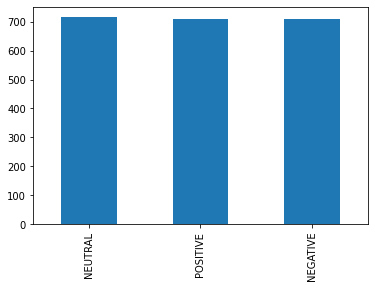

In [5]:
pd.value_counts(data['label']).plot.bar()

## Prepare Our Features and Target Labels

In [6]:
X = data.drop("label", axis=1)
y = data.label

X = np.array(X)
y = np.array(y)

print(X.shape, y.shape)

(2132, 2548) (2132,)


## Normalization

In [7]:
from sklearn.preprocessing import normalize
## normalize our features
X = normalize(X, axis=1)

## Encoding Target Labels

In [8]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(y)
y = le.transform(y)
y

array([0, 1, 2, ..., 0, 0, 1])

## Splitting Dataset into Train and Test sets with ratio of 80-20% respectively

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Import Our ML Classifiers and Metrics

In [10]:
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Random Forest

Test Accuracy:  0.8805620608899297


Text(0.5, 1.0, 'Confusion matrix')

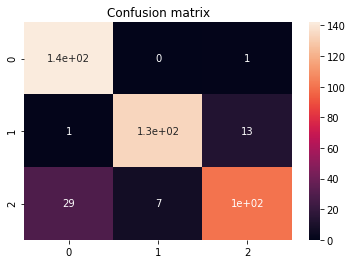

In [11]:
## Training
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)

## Prediction
y_pred_rf = rf.predict(X_test)

random_forest_score = accuracy_score(y_test, y_pred_rf)
print("Test Accuracy: ", random_forest_score)

## Confusion Matrix
cm = confusion_matrix(y_pred=y_pred_rf, y_true=y_test)
sns.heatmap(cm, annot=True).set_title('Confusion matrix')

## SVM

Test Accuracy:  0.7634660421545667


Text(0.5, 1.0, 'Confusion matrix')

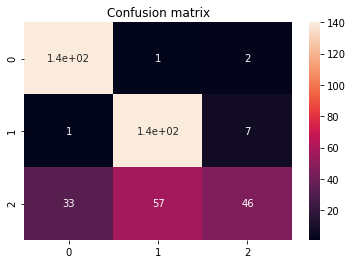

In [12]:
## Training
svc = svm.SVC(gamma="scale")
svc.fit(X_train, y_train)

## Prediction
y_pred_svm = svc.predict(X_test)
svc_score = accuracy_score(y_test, y_pred_svm)
print("Test Accuracy: ", svc_score)

## Confusion Matrix
cm = confusion_matrix(y_pred=y_pred_svm, y_true=y_test)
sns.heatmap(cm, annot=True).set_title('Confusion matrix')

## Logistic Regression

Test Accuracy:  0.7330210772833724


Text(0.5, 1.0, 'Confusion matrix')

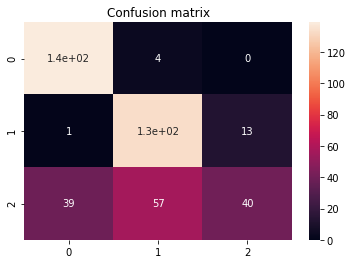

In [13]:
## Training
lr = LogisticRegression(solver="lbfgs", max_iter=200)
lr.fit(X_train, y_train)

## Prediction
y_pred_lr = lr.predict(X_test)
logistic_regression_score = accuracy_score(y_test, y_pred_lr)
print("Test Accuracy: ", logistic_regression_score)

## Confusion Matrix
cm = confusion_matrix(y_pred=y_pred_lr, y_true=y_test)
sns.heatmap(cm, annot=True).set_title('Confusion matrix')

## K-Nearest Neighbors

Test Accuracy:  0.810304449648712


Text(0.5, 1.0, 'Confusion matrix')

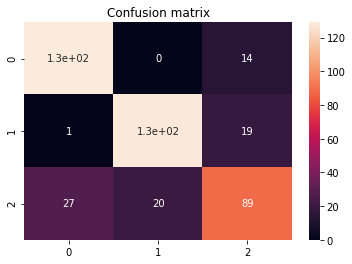

In [14]:
## Training
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

## Prediction
y_pred_knn = knn.predict(X_test)

knn_score = accuracy_score(y_test, y_pred_knn)
print("Test Accuracy: ", knn_score)

## Confusion Matrix
cm = confusion_matrix(y_pred=y_pred_knn, y_true=y_test)
sns.heatmap(cm, annot=True).set_title('Confusion matrix')

## Decision Tree

Test Accuracy:  0.810304449648712


Text(0.5, 1.0, 'Confusion matrix')

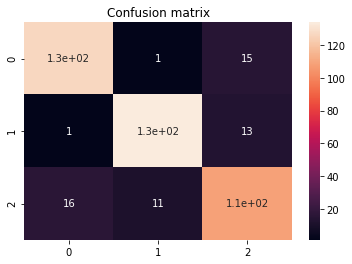

In [15]:
## Training
dt = tree.DecisionTreeClassifier()
dt = dt.fit(X_train, y_train)

## Prediction
y_pred_dt = dt.predict(X_test)

dt_score = accuracy_score(y_test, y_pred_knn)
print("Test Accuracy: ", dt_score)

## Confusion Matrix
cm = confusion_matrix(y_pred=y_pred_dt, y_true=y_test)
sns.heatmap(cm, annot=True).set_title('Confusion matrix')

## OneHot Encoding the Labels to prepare them for the NN model

In [16]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(sparse=False)
y = y.reshape(len(y), 1)
onehot_encoded_y = onehot_encoder.fit_transform(y)
print(onehot_encoded_y)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


## Neural Networks

In [17]:
## Creating a model
from tensorflow.keras.models import Sequential
from  tensorflow.keras.layers  import Dense

model = Sequential()

# For first layer, input shape must be supplied
layer1 = Dense(units = 512, activation = 'relu', input_dim = X.shape[1])
model.add(layer1)

layer2 = Dense(units = 512, activation = 'relu')
model.add(layer2)

layer3 = Dense(units = 3, activation = 'softmax')
model.add(layer3)

/home/snow/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/snow/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/snow/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/snow/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWa

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, onehot_encoded_y, test_size=0.2, random_state=42)

In [20]:
model.fit(X_train, y_train, epochs=25)

Epoch 1/25
1705/1705 [==============================] - 1s 620us/sample - loss: 0.7238 - acc: 0.6786
Epoch 2/25
1705/1705 [==============================] - 1s 306us/sample - loss: 0.6020 - acc: 0.7220
Epoch 3/25
1705/1705 [==============================] - 1s 308us/sample - loss: 0.5905 - acc: 0.7279
Epoch 4/25
1705/1705 [==============================] - 1s 314us/sample - loss: 0.5710 - acc: 0.7513
Epoch 5/25
1705/1705 [==============================] - 1s 306us/sample - loss: 0.5571 - acc: 0.7554
Epoch 6/25
1705/1705 [==============================] - 1s 308us/sample - loss: 0.5498 - acc: 0.7572
Epoch 7/25
1705/1705 [==============================] - 0s 278us/sample - loss: 0.5259 - acc: 0.7560
Epoch 8/25
1705/1705 [==============================] - 1s 294us/sample - loss: 0.5125 - acc: 0.7765
Epoch 9/25
1705/1705 [==============================] - 0s 277us/sample - loss: 0.5045 - acc: 0.7718
Epoch 10/25
1705/1705 [==============================] - 0s 255us/sample - loss: 0.4990 - a

In [21]:
nn_score = model.evaluate(X_test, y_test)[1]

427/427 [==============================] - 0s 205us/sample - loss: 0.4798 - acc: 0.8454


In [22]:
print("RandomForestClassifier : ", random_forest_score)
print("K Nearest Neighbors : ", knn_score)
print("Logistic Regression : ", logistic_regression_score)
print("Support Vector Classifier : ", svc_score)
print("Decision Tree Classifier : ", dt_score)
print("Artificial Neural Networks : ", nn_score)

RandomForestClassifier :  0.8805620608899297
K Nearest Neighbors :  0.810304449648712
Logistic Regression :  0.7330210772833724
Support Vector Classifier :  0.7634660421545667
Decision Tree Classifier :  0.810304449648712
Artificial Neural Networks :  0.84543324


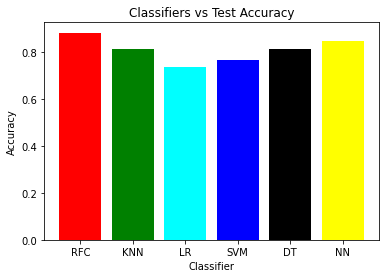

In [23]:
import matplotlib.pyplot as plt

accuracy = [random_forest_score, knn_score, logistic_regression_score, svc_score, dt_score, nn_score]
plt.bar(['RFC', 'KNN', 'LR', 'SVM', 'DT', 'NN'],accuracy, color=['red', 'green', 'cyan', 'blue', 'black', 'yellow'])
plt.xlabel('Classifier')
plt.ylabel('Accuracy')

plt.title('Classifiers vs Test Accuracy')

plt.show()